In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
)
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
base = pd.read_csv("data/insurance.csv")

base.head()

,Unnamed: 0,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,1,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,2,False,Senior,Prole,Cautious,Current,NaN,Football,NaN,Economy,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,3,False,Senior,UpperMiddle,Psychopath,Current,NaN,Football,NaN,FamilySedan,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,4,False,Adolescent,Middle,Normal,Older,NaN,EggShell,NaN,Economy,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,5,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many


In [3]:
base.drop(columns=["Unnamed: 0"], inplace=True)

base.head()

,GoodStudent,Age,SocioEcon,RiskAversion,VehicleYear,ThisCarDam,RuggedAuto,Accident,MakeModel,DrivQuality,...,HomeBase,AntiTheft,PropCost,OtherCarCost,OtherCar,MedCost,Cushioning,Airbag,ILiCost,DrivHist
0,False,Adult,Prole,Adventurous,Older,Moderate,EggShell,Mild,Economy,Poor,...,City,False,TenThou,Thousand,True,Thousand,Poor,False,Thousand,Many
1,False,Senior,Prole,Cautious,Current,NaN,Football,NaN,Economy,Normal,...,City,True,Thousand,Thousand,True,Thousand,Good,True,Thousand,Zero
2,False,Senior,UpperMiddle,Psychopath,Current,NaN,Football,NaN,FamilySedan,Excellent,...,City,False,Thousand,Thousand,False,Thousand,Good,True,Thousand,One
3,False,Adolescent,Middle,Normal,Older,NaN,EggShell,NaN,Economy,Normal,...,Suburb,False,Thousand,Thousand,True,Thousand,Fair,False,Thousand,Zero
4,False,Adolescent,Prole,Normal,Older,Moderate,Football,Moderate,Economy,Poor,...,City,False,TenThou,Thousand,False,Thousand,Fair,False,Thousand,Many


In [4]:
base.dropna(inplace=True)

In [5]:
y = base.iloc[:, 7].values

X = pd.concat([base.iloc[:, 0:6], base.iloc[:, 8:]], axis=1)

X = X.values

In [7]:
labelEncoder = LabelEncoder()

for i in range(0, X.shape[1]):
    if X[:, i].dtype == "object":
        X[:, i] = labelEncoder.fit_transform(X[:, i])

In [8]:
# X independent variables
# y dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [23]:
modelo = RandomForestClassifier(n_estimators=500, random_state=1)
modelo = RandomForestClassifier(n_estimators=500, random_state=1, max_depth=18, max_leaf_nodes=12)

modelo.fit(X_train, y_train)

RandomForestClassifier(max_depth=18, max_leaf_nodes=12, n_estimators=500,
                       random_state=1)

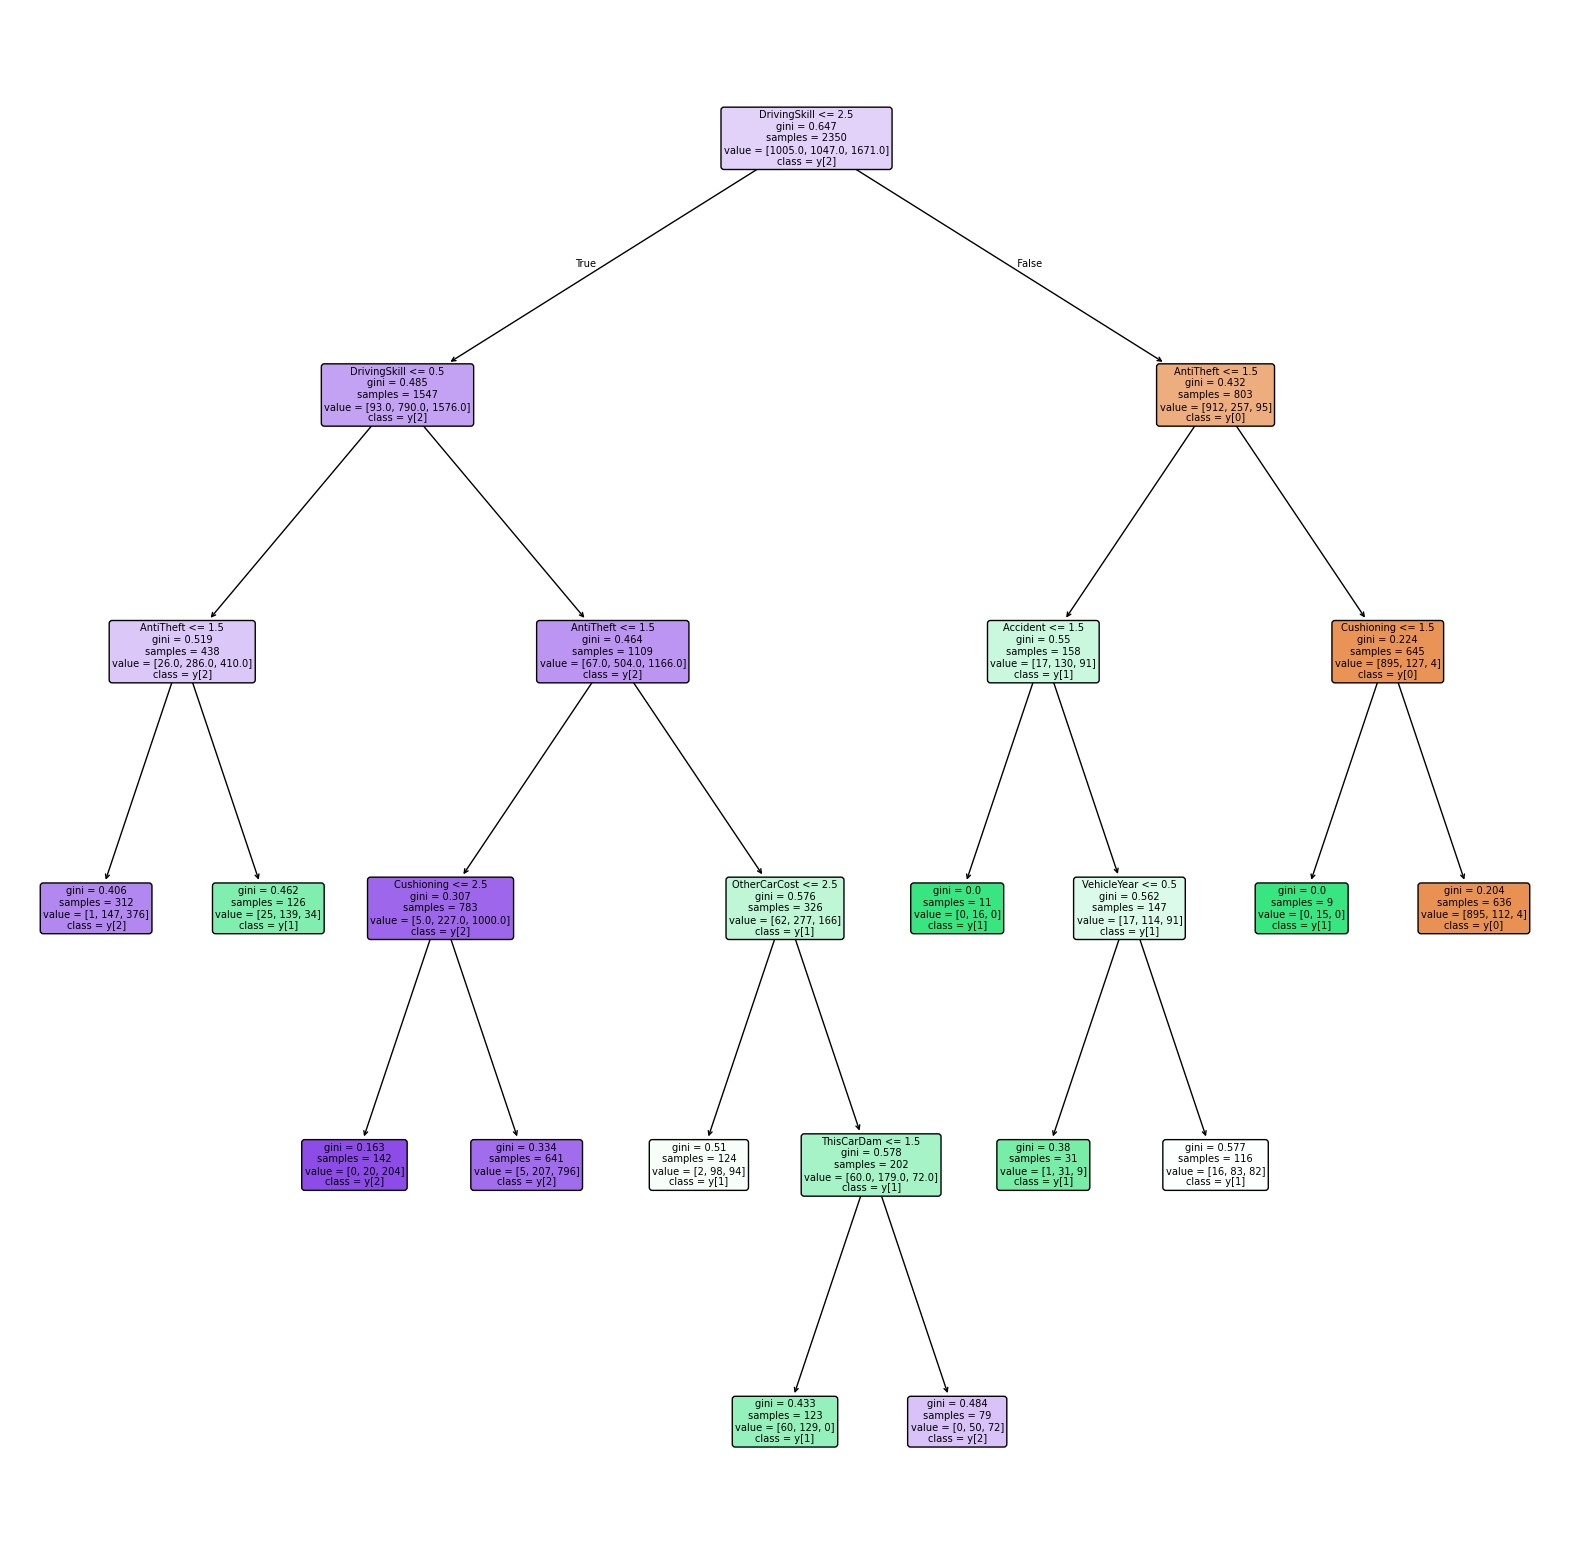

In [24]:
tree_index = 0
tree_to_visualize = modelo.estimators_[tree_index]
plt.figure(figsize=(20, 20))
plot_tree(tree_to_visualize, filled=True, feature_names=base.columns[0:-1], class_names=True, rounded=True)
plt.show()

In [25]:
previsao = modelo.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, previsao))
print("Precision: ", precision_score(y_test, previsao, average="micro"))
print("Recall: ", recall_score(y_test, previsao, average="micro"))
print("F1: ", f1_score(y_test, previsao, average="micro"))

Accuracy:  0.8546365914786967
Precision:  0.8546365914786967
Recall:  0.8546365914786967
F1:  0.8546365914786967


In [13]:
print(classification_report(y_test, previsao))

              precision    recall  f1-score   support

        Mild       0.94      0.89      0.92       423
    Moderate       0.79      0.76      0.78       497
      Severe       0.86      0.92      0.89       676

    accuracy                           0.86      1596
   macro avg       0.87      0.86      0.86      1596
weighted avg       0.86      0.86      0.86      1596

